In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
plt.rcParams.update({'font.family': 'serif'})
pi = np.pi
e = np.e

# Condiciones iniciales

In [1]:
# #Output
# outputfile = ./

# #Evolution
# expansion = true
# evolver = VV2

# #Lattice
# N = 128
# dt = 0.01
# kIR = 0.537

# #Times
# tOutputFreq = 0.1
# tOutputInfreq = 1
# tOutputVerb = 1

# tMax = 1000
# t0 = -110

# #Spectra options
# PS_type = 1
# PS_version = 1

# #GWs
# GWprojectorType = 1
# withGWs = false

# #IC
# initial_amplitudes =  3.538000e+19
# initial_momenta= -1.014435e+13
# baseSeed = 1234

# #Model Parameters
# gamma =  2.601e-11


In [2]:
# Example, lphi4
initial_amplitudes = 14.5#5.6964e18 # homogeneous amplitudes in GeV
initial_momenta = -0.815*0.511e-5#4.86735e30 # homogeneous amplitudes in GeV2
gamma = 0.511e-5**2 

V = gamma*initial_amplitudes**4
epsilon = initial_momenta**2/(V)
print('Slow-roll parameter, example lphi4: ', epsilon)

V = gamma*initial_amplitudes**2
epsilon = initial_momenta**2/(V)
print('Slow-roll parameter, example lphi2: ', epsilon)


Slow-roll parameter, example lphi4:  1.5025993911896402e-05
Slow-roll parameter, example lphi2:  0.0031592152199762186


Given the ratio $\dot{\phi}/\phi$ we calculate a new $\dot{\phi}$ and $\gamma$ such that the ratio and the slow-roll parameter $\epsilon$ are the same as the geometrized ones. 

In [3]:
# Valores directos de Alexander:
initial_amplitudes = 16.0257  
initial_momenta = -4.58536e-6  
gamma = 1.57692e-11

V = gamma*initial_amplitudes**2
epsilon = initial_momenta**2/(V)

ratio = initial_momenta/initial_amplitudes
print('\N{greek small letter epsilon}, Alexander= ', epsilon)
print('\N{greek small letter phi}\N{prime}/\N{greek small letter phi}= ', ratio)


# To natural units change
initial_amplitudes = 3.91027e19  # homogeneous amplitudes in GeV 
initial_momenta = ratio*initial_amplitudes  # homogeneous amplitudes in GeV2
gamma = initial_momenta**2/(initial_amplitudes**2*epsilon)

V = gamma*initial_amplitudes**2
epsilon = initial_momenta**2/(V)

print('\n\N{greek small letter epsilon}, natural= ', epsilon)
print('\N{greek small letter phi}\N{prime}/\N{greek small letter phi}= ', initial_momenta/initial_amplitudes)
mp = 2.44e18
print('H²/\N{greek small letter epsilon}:',V/(epsilon*mp**2))

print('\n___________________________\n')
print('\N{greek small letter phi} = ', format(initial_amplitudes, 'e'))
print('\N{greek small letter phi}\N{prime}=', format(initial_momenta, 'e'))
print('\N{greek small letter gamma} = ', gamma)


ε, Alexander=  0.005191623598748721
φ′/φ=  -2.8612541105848727e-07

ε, natural=  0.005191623598748722
φ′/φ=  -2.8612541105848727e-07
H²/ε: 7.80082082476903e-07

___________________________

φ =  3.910270e+19
φ′= -1.118828e+13
γ =  1.5769199999999998e-11


In [4]:
# Caravano conditions:
N = 128
m = 0.51e-5
phi0 = 14.5
phidot = -0.8152 *m
V = 0.5*m**2*phi0**2
Hin = V**0.5
epsilon = 0.5*phidot**2/(V)
print('\N{greek small letter epsilon} =', epsilon)
kmin = 0.76*Hin
kmax = 84.5*Hin
print('H^2/epsilon:',V/epsilon)
ratio = phidot/phi0
print('\N{greek small letter phi}\N{prime}/\N{greek small letter phi}= ', ratio)


# To natural units change
mp = 2.44e18
# m = 0.51e-5*mp
initial_amplitudes = 14.5*mp
# phidot = -0.8152*mp *m


initial_momenta = ratio*initial_amplitudes
gamma = (initial_momenta**2/(initial_amplitudes**2*epsilon))

V = 0.5*gamma*initial_amplitudes**2
Hin=V**0.5
print('\N{greek small letter epsilon} =', 0.5*initial_momenta**2/(V))
kmin=0.76*Hin
kmax=84.5*Hin
print('\nkmin = ', format(kmin, 'e'))
print('___________________________\nVALORES A USAR EN EL CÓDIGO:')
print('initial_amplitudes =', format(initial_amplitudes, 'e'))
print('initial_momenta =', format(initial_momenta, 'e'))
print('gamma = ', gamma)

ε = 0.00316076594530321
H^2/epsilon: 8.650755219832327e-07
φ′/φ=  -2.867255172413793e-07
ε = 0.0031607659453032106

kmin =  9.696759e+13
___________________________
VALORES A USAR EN EL CÓDIGO:
initial_amplitudes = 3.538000e+19
initial_momenta = -1.014435e+13
gamma =  2.601e-11


In [5]:
m**2

2.6010000000000002e-11

In [6]:
V/(epsilon*mp**2)

8.650755219832326e-07

En el código del modelo, se define $f_*=\phi_0$, $\omega_*=\sqrt{\gamma}f_*$. Estos valores son sugeridos por el ejemplo, de todas formas, son arbitrarios.

Para definir el $\tilde{k}_{IR}$ requerido en el input, calculamos $$\tilde{k}_{IR}=\dfrac{k_{IR}}{\omega_*}=\dfrac{k_{IR}}{\sqrt{\gamma}\phi_0}$$ en el caso de nuestra simulación queremos que los k se ocupen en $[1,100]$, entonces $k_{IR}=1$, el $N$ requerido para que $k_{max}=100$ se calcula mediante:  $$N=\dfrac{2k_{max}}{\sqrt{3}k_{IR}}$$

In [7]:
fstar = initial_amplitudes
omega = gamma**0.5 * fstar*1e5

kIR = kmin / omega
kmachinemax = kmax / omega
print('k_machine_max: ', kmachinemax)
print('kIR =', kIR)

N = 2*kmax // (3**0.5 * kmin)
print('N =', N)

k_machine_max:  0.0005975052301026327
kIR = 5.374011537017761e-06
N = 128.0


Para determinar los tiempos en los que se debe simular, tenemos en cuenta las siguientes expresiones:

El congelamiento de cada modo ocurre cuando:
$$k=a(t_k)H(t_k)$$

El número de e-folds N antes del final de la inflación para un modo k que sale del horizonte está dado por:
$$N_k=\ln{a_f/a_k}=\ln{k/a_fH}$$

El tiempo de congelamiento se da en:
$$t_k=t_f-\frac{N_k}{H}=t_f-\frac{\ln{k/a_fH}}{H}$$

En inflación, $H^2\approx V \Rightarrow H\approx \sqrt{V}$ 
En conclusión:
$$t_k=t_f-\frac{\ln{(k/a_f\sqrt{\gamma}\phi_0)}}{\sqrt{\gamma}\phi_0}=t_f-\frac{\ln{(k/a_f\omega_*)}}{\omega_*}$$

En variables de máquina será:
$$\tilde{\eta}_k=\tilde{\eta}_f-\ln{(k/a_f\omega_*)}$$

In [8]:
tf = 0
af = e**60
etamax = tf - np.log(kmin/(af*omega))
etamin = tf - np.log(kmax/(af*omega))

print('\N{greek small letter eta}_min = \N{greek small letter delta}t = ', etamin)
print('\N{greek small letter eta}_max = ', etamax)

NameError: name 'e' is not defined

In [ ]:
etamin = -1/kmachinemax
etamax = -1/kIR

print('\N{greek small letter eta}_min = \N{greek small letter delta}t =', etamin)
print('\N{greek small letter eta}_max =', etamax)
kmax/kmin
etamax/etamin

η_min = δt = -1673.6255176012958
η_max = -186080.73189119672


111.1842105263158

In [ ]:
format(omega,'e')

'1.804380e+19'

# Cargar datos

In [ ]:
path = '../build_phi2/'

# Load data
energies = pd.read_csv(path + 'average_energies.txt', sep='    ', header=None, engine='python').dropna()
energies.columns = ['eta','K','G', 'V', 'rho']

energy_cons = pd.read_csv(path + 'average_energy_conservation.txt', sep='    ', header=None, engine='python').dropna()
energy_cons.columns = ['eta','deltaE','lhs','rhs']

scalar0 = pd.read_csv(path + 'average_scalar_0.txt', sep='    ', header=None, engine='python').dropna()
scalar0.columns = ['eta','phi','phi_prime', 'phi2', 'phi_prime2', 'rms_phi', 'rms_phi_prime']

scale_factor = pd.read_csv(path + 'average_scale_factor.txt', sep='    ', header=None, engine='python').dropna()
scale_factor.columns = ['eta','a','a_prime', 'H']

spectra_time = pd.read_csv(path + 'average_spectra_times.txt', sep='    ', header=None, engine='python').dropna()

# spectra_scalar0 = pd.read_csv(path + 'spectra_scalar_0.txt', sep=' ', header=None, engine='python')
# spectra_scalar0.columns = ['k','S_phi','S_phi_prime','n_k']

## Definición de e-folds

In [ ]:
Ne = np.log(-scale_factor['a'])
Ne

/home/camilo/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0              NaN
1        11.870884
2        12.573005
3        12.993343
4        13.301686
           ...    
11097    70.882401
11098    70.882465
11099    70.882529
11100    70.882593
11101    70.882657
Name: a, Length: 11102, dtype: float64

# Plottear 

## Energías

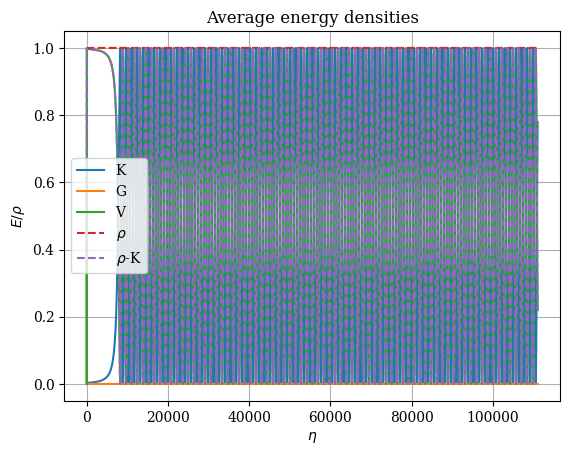

In [ ]:
plt.plot(energies['eta'], energies['K']/energies['rho'], label='K')
plt.plot(energies['eta'], energies['G']/energies['rho'], label='G')
plt.plot(energies['eta'], energies['V']/energies['rho'], label='V')
plt.plot(energies['eta'], energies['rho']/energies['rho'],'--', label=r'$\rho$')
plt.plot(energies['eta'], (energies['rho']-energies['K'])/energies['rho'], '--', label=r'$\rho$-K')

plt.title('Average energy densities')
plt.ylabel(r'$E/\rho$')
plt.xlabel(r'$\eta$')

# plt.yscale('log')
plt.grid()
plt.legend()
plt.show()

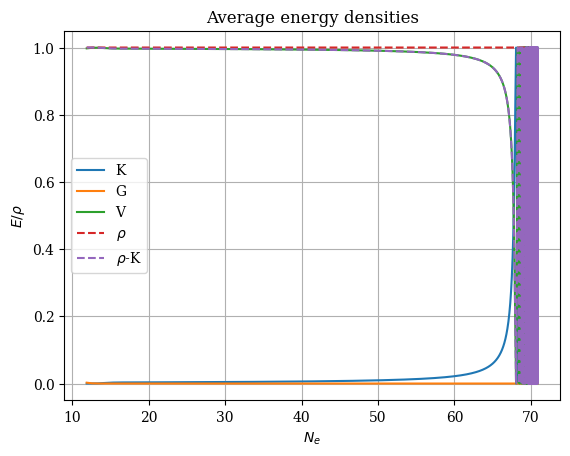

In [ ]:
plt.plot(Ne, energies['K']/energies['rho'], label='K')
plt.plot(Ne, energies['G']/energies['rho'], label='G')
plt.plot(Ne, energies['V']/energies['rho'], label='V')
plt.plot(Ne, energies['rho']/energies['rho'],'--', label=r'$\rho$')
plt.plot(Ne, (energies['rho']-energies['K'])/energies['rho'], '--', label=r'$\rho$-K')

plt.title('Average energy densities')
plt.ylabel(r'$E/\rho$')
plt.xlabel(r'$N_e$')

# plt.yscale('log')
plt.grid()
plt.legend()
plt.show()

## Conservación

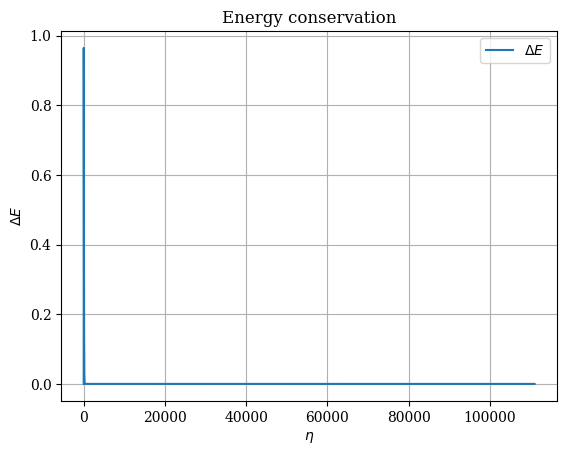

In [ ]:
plt.plot(energy_cons['eta'], energy_cons['deltaE'], label=r'$\Delta E$')
# plt.plot(energy_cons['eta'], energy_cons['lhs'], label='lhs')
# plt.plot(energy_cons['eta'], energy_cons['rhs'], '--', label='rhs')

plt.title('Energy conservation')
plt.ylabel(r'$\Delta E$')
plt.xlabel(r'$\eta$')
# plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

## Promedio del campo

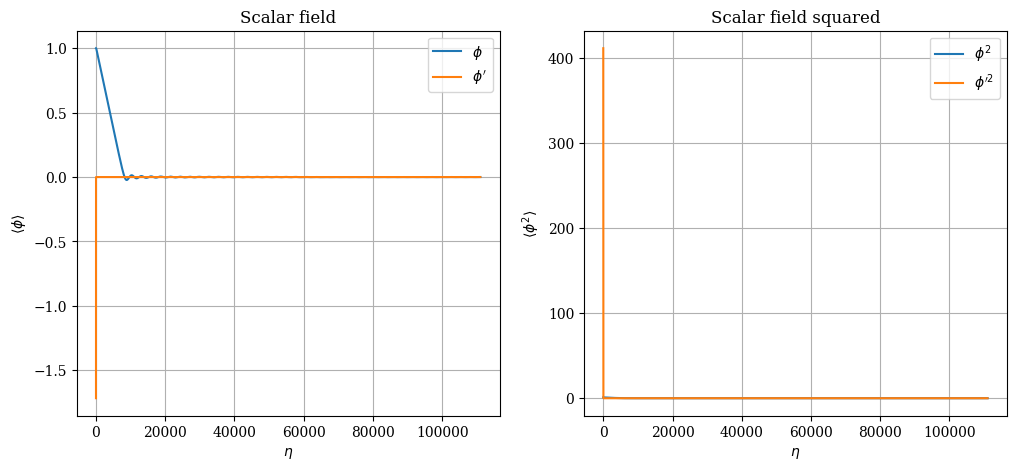

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(scalar0['eta'], scalar0['phi'], label=r'$\phi$')
plt.plot(scalar0['eta'], scalar0['phi_prime'], label=r'$\phi^\prime$')

plt.title('Scalar field')
plt.ylabel(r'$\langle\phi\rangle$')
plt.xlabel(r'$\eta$')
# plt.yscale('log')
# plt.ylim(0.99,1.01)

plt.legend()
plt.grid()


plt.subplot(1,2,2)

plt.plot(scalar0['eta'], scalar0['phi2'], label=r'$\phi^2$')
plt.plot(scalar0['eta'], scalar0['phi_prime2'], label=r'$\phi^{\prime 2}$')

plt.title('Scalar field squared')
plt.ylabel(r'$\langle\phi^2\rangle$')
plt.xlabel(r'$\eta$')

plt.legend()
plt.grid()
plt.show()




In [ ]:
Ne[Ne>6.9]

1        11.870884
2        12.573005
3        12.993343
4        13.301686
5        13.551127
           ...    
11097    70.882401
11098    70.882465
11099    70.882529
11100    70.882593
11101    70.882657
Name: a, Length: 11101, dtype: float64

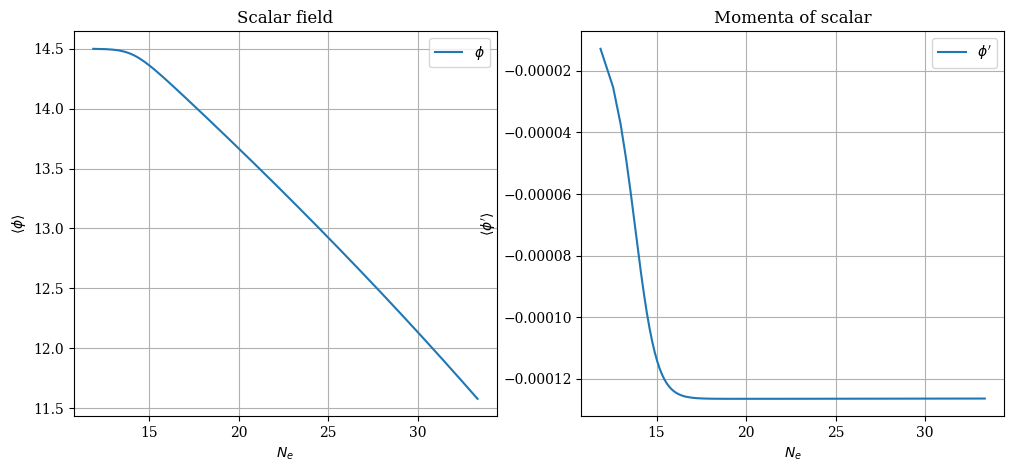

-1.71689240117071


In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(Ne[:167], scalar0['phi'][:167]*14.5, label=r'$\phi$')

plt.title('Scalar field')
plt.ylabel(r'$\langle\phi\rangle$')
plt.xlabel(r'$N_e$')
# plt.yscale('log')
# plt.ylim(0.99,1.01)

plt.legend()
plt.grid()


plt.subplot(1,2,2)
plt.plot(Ne[:167], scalar0['phi_prime'][:167], label=r'$\phi^\prime$')
plt.title('Momenta of scalar')
# plt.plot(Ne, scalar0['phi2'], label=r'$\phi^2$')
# plt.plot(Ne, scalar0['phi_prime2'], label=r'$\phi^{\prime 2}$')

# plt.title('Scalar field squared')
# plt.ylabel(r'$\langle\phi^2\rangle$')
plt.ylabel(r'$\langle\phi^\prime\rangle$')
plt.xlabel(r'$N_e$')

plt.legend()
plt.grid()
plt.show()
print(scalar0['phi_prime'][0])

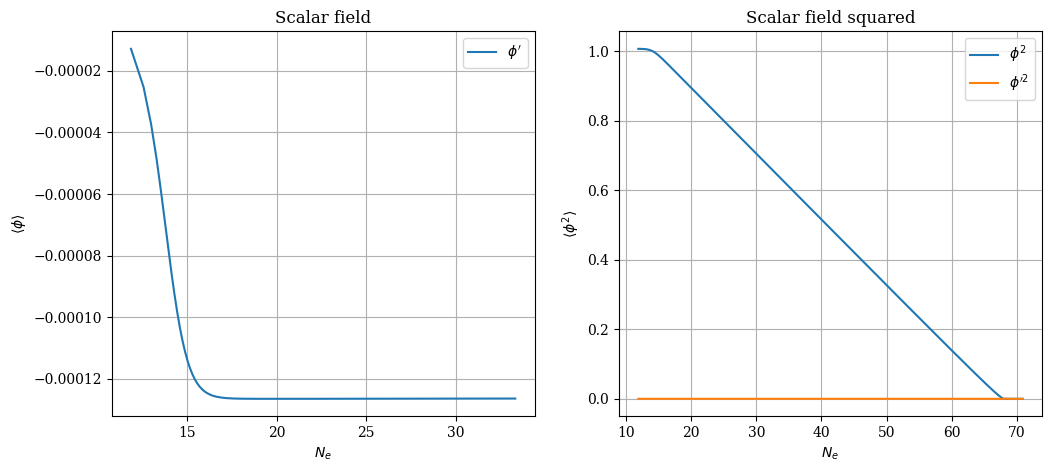

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(Ne[:167], scalar0['phi_prime'][:167], label=r'$\phi^\prime$')

plt.title('Scalar field')
plt.ylabel(r'$\langle\phi\rangle$')
plt.xlabel(r'$N_e$')
# plt.yscale('log')
# plt.ylim(0.99,1.01)

plt.legend()
plt.grid()


plt.subplot(1,2,2)

plt.plot(Ne, scalar0['phi2'], label=r'$\phi^2$')
plt.plot(Ne, scalar0['phi_prime2'], label=r'$\phi^{\prime 2}$')

plt.title('Scalar field squared')
plt.ylabel(r'$\langle\phi^2\rangle$')
plt.xlabel(r'$N_e$')

plt.legend()
plt.grid()
plt.show()

## Factor de escala

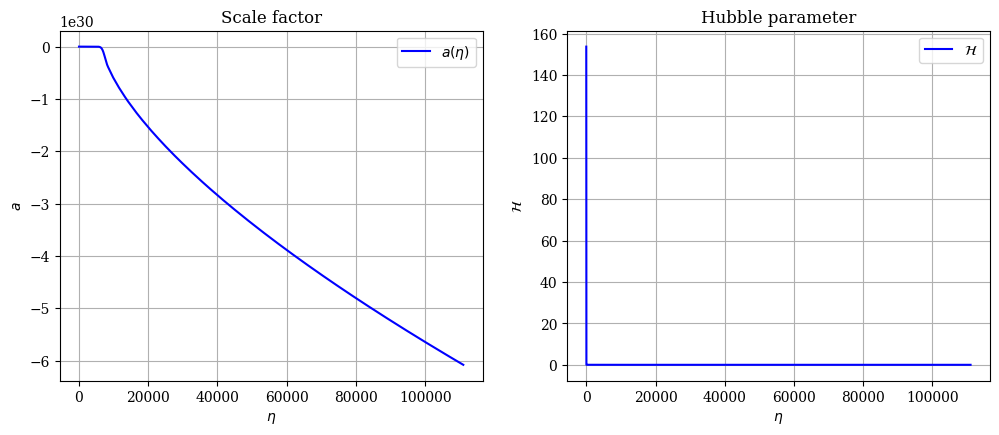

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.plot(scale_factor['eta'], scale_factor['a'], label=r'$a(\eta)$', color='blue')
# plt.plot(scale_factor['eta'], np.exp(scale_factor['H']*scale_factor['eta']),'--')


plt.title('Scale factor')
plt.xlabel(r'$\eta$')
plt.ylabel(r'$a$')

plt.legend()
plt.grid()


plt.subplot(2,2,2)
plt.plot(scale_factor['eta'], scale_factor['H'], label=r'$\mathcal{H}$', color='blue')
# plt.plot(scale_factor['eta'][21::], 1/scale_factor['eta'][21::], '--', label=r'$1/\eta$')
plt.title('Hubble parameter')
plt.xlabel(r'$\eta$')
plt.ylabel(r'$\mathcal{H}$')

plt.legend()
plt.grid()

# plt.subplot(2,2,(3,4))


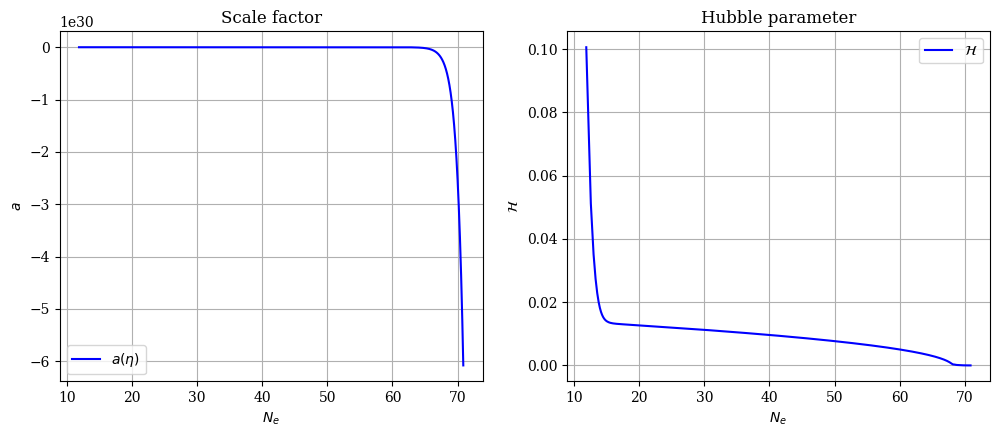

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.plot(Ne, scale_factor['a'], label=r'$a(\eta)$', color='blue')
# plt.plot(Ne, np.exp(Ne),'--')
# plt.plot(N_e,np.exp(scale_factor['H']*N_e),'--',label=r'$exp(\mathcal{H}\eta)$')

plt.title('Scale factor')
plt.xlabel(r'$N_e$')
plt.ylabel(r'$a$')

plt.legend()
plt.grid()


plt.subplot(2,2,2)
plt.plot(Ne, scale_factor['H'], label=r'$\mathcal{H}$', color='blue')
# plt.plot(N_e[21::], 1/N_e[21::], '--', label=r'$1/\eta$')
plt.title('Hubble parameter')
plt.xlabel(r'$N_e$')
plt.ylabel(r'$\mathcal{H}$')

plt.legend()
plt.grid()

# plt.subplot(2,2,(3,4))


## Espectro

In [ ]:
file = np.loadtxt(path+'spectra_scalar_0.txt') # Se carga el archivo
file = file[~np.isnan(file).any(axis=1)] # Remove rows with NaN values

step = 0 # Vamos a determinar cuántos k tiene cada bloque
i = 1 # Contador de líneas en el bloque
while step==0: # Se detiene cuando le demos un valor
    if file[:,0][i] == file[:,0][0]: # Entra si encuentra un valor igual al primero,
                                     # o sea si el k vuelve a empezar a contar (nuevo bloque)
        step = i # Las veces que tuvo que verificar es la cantidad de líneas por bloque
    i+=1  # Si no es igual pasa a la siguiente
tmax = 0 # Ahora determinamos la cantidad de bloques
j = 0 # Contador de bloques
while tmax==0: 
    try: 
        file[:,0][(i+1)*j] # Intenta leer un valor de bloque en bloque,
                           # si no existe es porque se acabó el archivo
    except:
        tmax = j # La cantidad de bloques es las veces que iteró
    j+=1 # Si el valor existe, pasa al siguiente bloque

data = np.zeros((tmax,step,2)) # Creamos un array de ceros con la forma de los datos
for i in range(tmax): # Llenamos el array con los datos
    try:
        data[i,::,0] = file[step*i:step*(i+1),0] # El primer índice es el bloque, el segundo la linea
        data[i,::,1] = file[step*i:step*(i+1),1] # 0 y 1 son k y P(k) respectivamente
    except: # Si se acaban los datos, se detiene
        break
data

array([[[4.48799000e+00, 2.35913169e-06],
        [8.97598000e+00, 7.84930589e-06],
        [1.34640000e+01, 2.58894600e-05],
        ...,
        [4.53287000e+02, 2.62217488e-02],
        [4.57775000e+02, 3.38700629e-02],
        [4.62263000e+02, 1.68140539e-02]],

       [[4.48799000e+00, 2.33291206e-06],
        [8.97598000e+00, 7.76205756e-06],
        [1.34640000e+01, 2.56016354e-05],
        ...,
        [4.53287000e+02, 2.58838084e-02],
        [4.57775000e+02, 3.34334181e-02],
        [4.62263000e+02, 1.65972494e-02]],

       [[4.48799000e+00, 2.27939020e-06],
        [8.97598000e+00, 7.58397934e-06],
        [1.34640000e+01, 2.50142767e-05],
        ...,
        [4.53287000e+02, 2.52878736e-02],
        [4.57775000e+02, 3.26636591e-02],
        [4.62263000e+02, 1.62151185e-02]],

       ...,

       [[4.48799000e+00, 1.66820009e-13],
        [8.97598000e+00, 5.55042965e-13],
        [1.34640000e+01, 1.83070095e-12],
        ...,
        [4.53287000e+02, 1.85070977e-09],
     

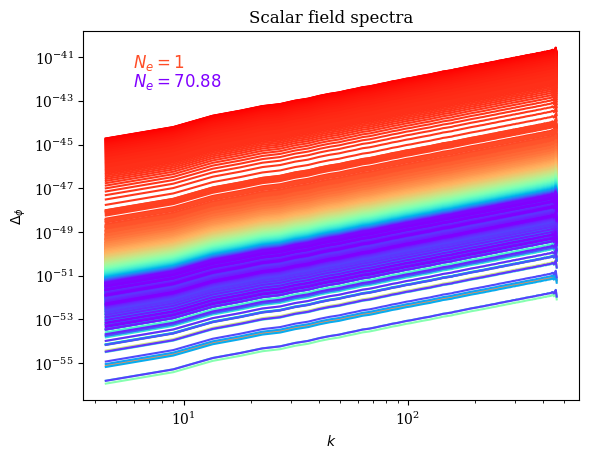

In [ ]:
# Crear un colormap arcoíris
cmap = plt.get_cmap('rainbow')

# Graficar cada línea con un color diferente
for i in range(tmax):
    color = cmap((tmax-i) / tmax)  # Obtener un color del colormap
    plt.loglog(data[i, :, 0], data[i, :, 1]/fstar**2, color=color)

plt.title('Scalar field spectra')
plt.ylabel(r'$\Delta_\phi$')
plt.xlabel(r'$k$')

plt.text(0.1, 0.85, r'$N_e = {:.2f}$'.format(list(Ne)[-1]), fontsize=12, color=color, transform=plt.gca().transAxes)
plt.text(0.1, 0.9, r'$N_e = 1$', fontsize=12, color=cmap(0.9), transform=plt.gca().transAxes)

# plt.yscale('log')
plt.show()

## Modificación del espectro

In [ ]:
print('kIR = ', kIR) 
print('omega = ', omega)

kIR =  5.374011537017761e-06
omega =  1.80438e+19


In [ ]:
kIR = 0.537*1e-5

dx = 2*pi/(N*kIR)
L = dx*N
kmachinemax = kmax / omega
kmachinemax

0.0005975052301026327

In [ ]:
# Extraemos los klat de los datos
klat_ = data[0,:,0]
klat_*omega/Hin

array([  634697.63257948,  1269395.26515897,  1904097.14037914,
        2538796.18717218,  3173481.0918296 ,  3808180.13862265,
        4442879.18541569,  5077578.23220874,  5712277.27900178,
        6346976.32579483,  6981675.37258787,  7616374.41938092,
        8251073.46617396,  8885772.51296701,  9520457.41762443,
       10155156.46441747, 10789855.51121052, 11424554.55800356,
       12059253.60479661, 12693952.65158965, 13328651.6983827 ,
       13963350.74517574, 14598078.07624003, 15232777.12303308,
       15867476.16982613, 16502175.21661917, 17136874.26341222,
       17771573.31020526, 18406272.3569983 , 19040971.40379135,
       19675670.4505844 , 20310369.49737744, 20945068.54417049,
       21579767.59096353, 22214466.63775658, 22849165.68454962,
       23483864.73134267, 24118563.77813571, 24753262.82492876,
       25387961.8717218 , 26022660.91851485, 26657359.9653079 ,
       27292059.01210094, 27926758.05889399, 28561457.10568703,
       29196156.15248007, 29830855.19927

In [ ]:
def keff(n1,n2,n3): 
    """Función definida según Caravano en la ec. 4.6"""
    return 2/dx * np.sqrt(np.sin(n1*pi/N)**2 + np.sin(n2*pi/N)**2 + np.sin(n3*pi/N)**2)

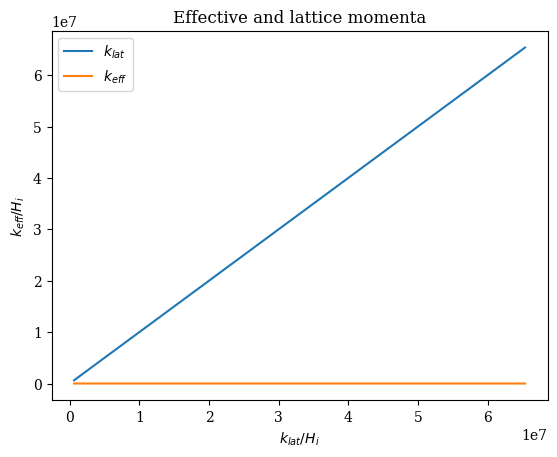

In [ ]:
s_ = np.linspace(0, pi/2-1, len(klat_)) # Array para (intentar) parametrizar linealmente keff
kesc = klat_*omega/Hin # Escala de klat en unidades de H
plt.plot(kesc,kesc, label = r'$k_{lat}$') # Se grafica klat vs klat
kk = klat_/kIR/2 # array de klat normalizado y dividido entre dos
plt.plot(kesc,keff(kk,kk,kk)*omega/Hin, label=r'$k_{eff}$') # Definición de Caravano. 
#Se normaliza con kIR y se divide entre dos porque el máximo está en n = N/2
# plt.plot(kesc,keff(kk,kk,kk) *pi/2*omega/Hin,'--', color='pink', label=r'$\frac{\pi}{2}k_{eff}$')
# # Con factor de pi/2 para demostrar que el maximo está divido entre pi/2, y coinciden para n<<N

# plt.plot(kesc,klat_/(1+s_)*omega/Hin,'--', label=r'$k_{lat}(1+s)$', color='lightgreen') # Aproximación linealizada

# plt.text(0.05, 0.64, r'$s=(0,0.57)$', transform=plt.gca().transAxes)

plt.title('Effective and lattice momenta')
plt.xlabel(r'$k_{lat}/H_{i}$')
plt.ylabel(r'$k_{eff}/H_{i}$')
plt.legend()
plt.show()

0


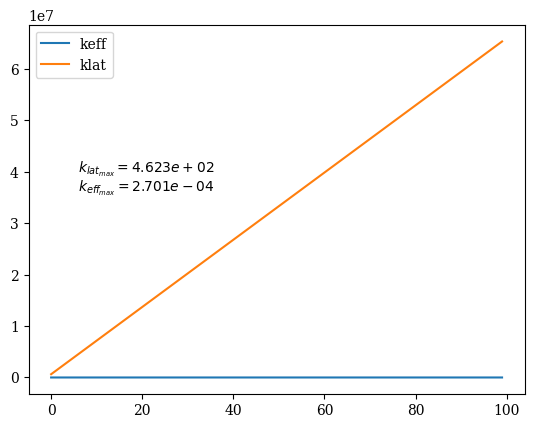

In [ ]:
for i in range(len(klat_)): # Se busca el índice donde keff es máximo
    if klat_[i]>keff(N/2,N/2,N/2)-kIR:
        indexkeffmax = i
        break
print(indexkeffmax) 

keff_ = np.zeros(len(klat_)) # Se crea un array para keff

for j in range(len(klat_)): 
    i = klat_[j]/(2*kIR) # Se normaliza klat y se divide entre dos
    keff_[j] = keff(i,i,i) # Se llena el array con los valores de keff

k_ = np.linspace(0,7e-4, len(keff_)) # Se crea un array para graficar
plt.plot(k_*omega/Hin,keff_*omega/Hin, label='keff') # Se grafica keff vs k
k_ = np.linspace(0,7e-4, len(klat_)) # Se cambia el array para graficar klat
plt.plot(k_*omega/Hin,klat_*omega/Hin, label='klat') # Se grafica klat vs k
plt.text(0.1,0.55,r'$k_{eff_{max}}='+f'{keff_[-1]:.3e}'+r'$', transform=plt.gca().transAxes) 
plt.text(0.1,0.6,r'$k_{lat_{max}}='+f'{klat_[-1]:.3e}'+r'$', transform=plt.gca().transAxes)
plt.legend();

/home/camilo/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  fig.canvas.print_figure(bytes_io, **kw)


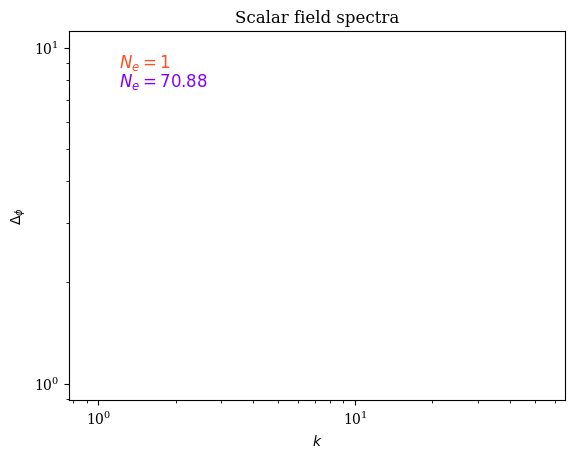

In [ ]:
# Crear un colormap arcoíris
cmap = plt.get_cmap('rainbow')
spectrum = np.zeros(len(klat_))
# Graficar cada línea con un color diferente
for i in range(tmax):
    color = cmap((tmax-i) / tmax)  # Obtener un color del colormap
    for j in range(indexkeffmax):
        spectrum[j] = data[i, j, 1]*(keff_[j]/klat_[j])**3 # El espectro se divide entre klat y se multiplica por keff
    plt.loglog(keff_*omega/Hin, spectrum, color=color) # Se grafica el espectro
    # plt.loglog(klat_*omega/Hin, data[i, :, 1], color=color) # Se grafica el espectro normal

    

plt.title('Scalar field spectra')
plt.ylabel(r'$\Delta_\phi$')
plt.xlabel(r'$k$')

plt.text(0.1, 0.85, r'$N_e = {:.2f}$'.format(list(Ne)[-1]), fontsize=12, color=color, transform=plt.gca().transAxes)
plt.text(0.1, 0.9, r'$N_e = 1$', fontsize=12, color=cmap(0.9), transform=plt.gca().transAxes)

# plt.yscale('log')
plt.show()

In [ ]:
152*kIR*omega

1.4728071312000004e+16

In [ ]:
klat_

array([  4.48799,   8.97598,  13.464  ,  17.952  ,  22.4399 ,  26.9279 ,
        31.4159 ,  35.9039 ,  40.3919 ,  44.8799 ,  49.3679 ,  53.8559 ,
        58.3439 ,  62.8319 ,  67.3198 ,  71.8078 ,  76.2958 ,  80.7838 ,
        85.2718 ,  89.7598 ,  94.2478 ,  98.7358 , 103.224  , 107.712  ,
       112.2    , 116.688  , 121.176  , 125.664  , 130.152  , 134.64   ,
       139.128  , 143.616  , 148.104  , 152.592  , 157.08   , 161.568  ,
       166.056  , 170.544  , 175.032  , 179.52   , 184.008  , 188.496  ,
       192.984  , 197.472  , 201.96   , 206.448  , 210.936  , 215.423  ,
       219.911  , 224.399  , 228.887  , 233.375  , 237.863  , 242.351  ,
       246.839  , 251.327  , 255.815  , 260.303  , 264.791  , 269.279  ,
       273.767  , 278.255  , 282.743  , 287.231  , 291.719  , 296.207  ,
       300.695  , 305.183  , 309.671  , 314.159  , 318.647  , 323.135  ,
       327.623  , 332.111  , 336.599  , 341.087  , 345.575  , 350.063  ,
       354.551  , 359.039  , 363.527  , 368.015  , 